# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [5]:
# Extract all rows of data
table = soup.find("table", class_="table")
rows = table.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
list =[]

# Loop through the scraped data to create a list of rows
for row in rows:
    facts = row.find_all("td")
    row_data = (fact.text for fact in facts)
    list.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

df= pd.DataFrame(list, columns = columns)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [10]:
# Confirm DataFrame was created successfully
new_df = df.dropna(subset=['id']).reset_index(drop=True)
new_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
new_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
new_df['terrestrial_date'] = pd.to_datetime(new_df['terrestrial_date'])
new_df['sol'] = new_df['sol'].astype(int)
new_df['ls'] = new_df['ls'].astype(int)
new_df['month'] = new_df['month'].astype(int)
new_df['min_temp'] = new_df['min_temp'].astype(float)
new_df['pressure'] = new_df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
new_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_months = new_df["month"].nunique()
mars_months

12

In [18]:
# 2. How many sols (Martian days) worth of data are there?
mars_sols = new_df["sol"].nunique()
mars_sols

1867

In [19]:
# 3. What is the average minimum temperature by month?
avg_min_temp = new_df.groupby("month")["min_temp"].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

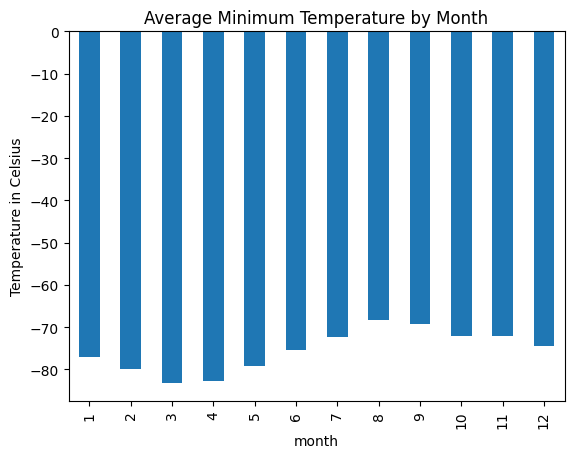

In [20]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', legend=False)
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

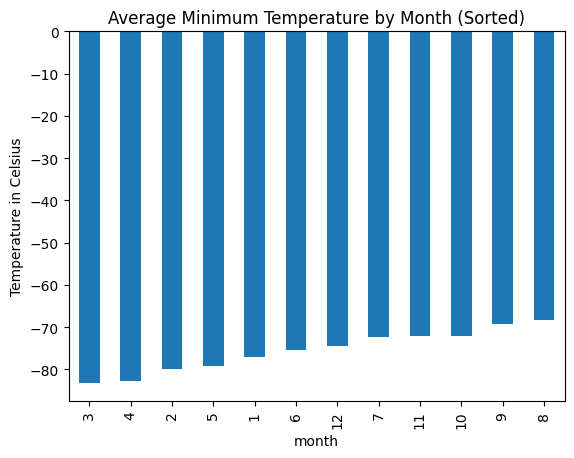

In [32]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()
sorted_avg_min_temp.plot(kind='bar', legend=False)
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.savefig("images/avg_min_temp")
plt.show()

In [23]:
new_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [24]:
# 4. What is the average pressure by month?
avg_pressure = new_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

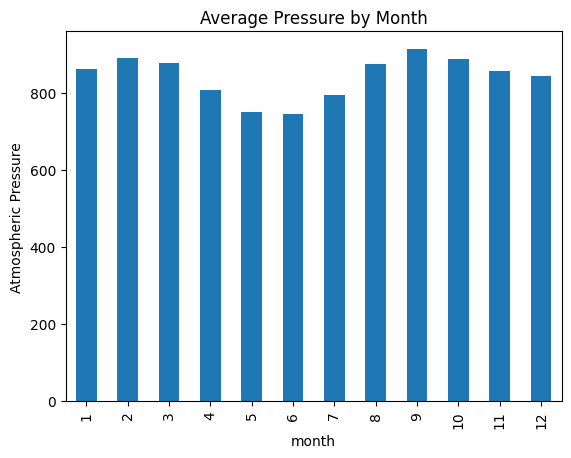

In [25]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', legend=False)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

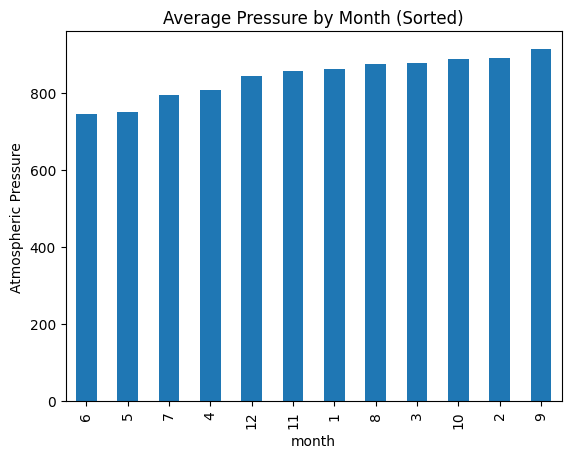

In [31]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()
sorted_avg_pressure.plot(kind='bar', legend=False)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month (Sorted)')
plt.savefig("images/avg_pressure")
plt.show()

In [27]:
new_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


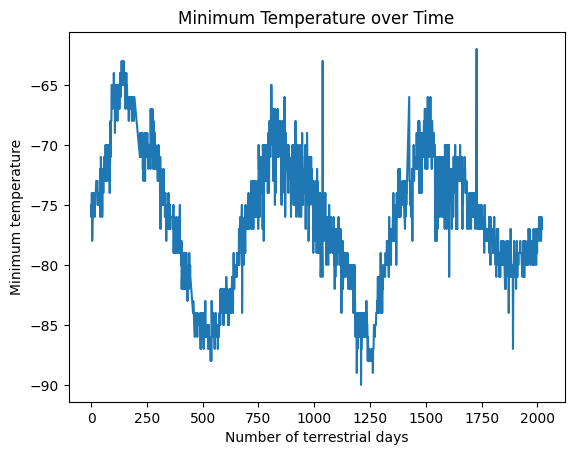

In [30]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
new_df["number_days"] = (new_df["terrestrial_date"] - new_df["terrestrial_date"].min()).dt.days

x_axis = new_df["number_days"]
y_axis = new_df["min_temp"]
plt.plot(x_axis, y_axis)

plt.title("Minimum Temperature over Time")
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")

plt.savefig("images/martian_year.png")
plt.show()

#### Minimum Temperature

The line plot of minimum temperature over time suggests a clear seasonal cycle on Mars, with temperature fluctuations over time. This indicates that, similar to Earth, Mars experiences changes in minimum temperatures based on its position in its orbit. The bar plot of average minimum temperature by month shows that the coldest months on Mars tend to be around months 3 and 4, while the warmest months are closer to months 8 and 9. The average minimum temperature ranges from about -90°C to around -70°C. Mars is an extremely cold planet, with even the warmer months only slightly less frigid than the coldest months.

#### Atmospheric Pressure

There is a clear variation in pressure throughout the Martian year. The highest atmospheric pressures seem to occur around months 2, 9, and 10, while the lowest pressures are observed around months 5 and 6. The atmospheric pressure on Mars ranges from approximately 745 to around 913. This pressure is much lower than Earth's average pressure, highlighting Mars' thin atmosphere. The fluctuation in pressure within this range over a Martian year shows that while pressure changes are noticeable, they remain within the low-pressure threshold typical for Mars.

#### Year Length

A Martian year is approximately 687 Earth days. This is because Mars takes about that long to complete one orbit around the Sun, which is nearly twice as long as Earth's year (365 days). By observing the recurring peaks and troughs in temperature and pressure data, you can confirm that the Martian year aligns with this period. This prolonged year contributes to the significant temperature and pressure variations on Mars, as each season has more time to influence the atmosphere and surface conditions. In summary, your analysis of seasonal changes in minimum temperature and atmospheric pressure suggests a Martian year length close to 687 Earth days, consistent with Mars' orbital period around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
new_df.to_csv("mars_df.csv", index=False)

In [34]:
browser.quit()